In [5]:
import matplotlib.pyplot as plt
import anndata as adata
import scanpy as sc
import pandas as pd
import snapatac2 as snap
import numpy as np
from harmonypy import run_harmony
from pybedtools import BedTool
import subprocess

In [6]:
# regions = ['AMY','HIP','PFC']
# celltypes = ['OPC-Oligo', 'Immune','Astro-Epen','Vascular','Neuron']

# for celltype in celltypes:
#     for region in regions:
#         # read the network genertaed by CICRE
#         df_network = pd.read_csv(f'/data2st1/junyi/output/cicre/{region}_{celltype}_circe_network.csv', index_col=0)
#         distance = df_network.Peak1.str.split('_').str[1].astype(int) -df_network.Peak2.str.split('_').str[1].astype(int)
#         distance[distance.abs()<500_000].abs().hist(bins=100)
#         plt.axvline(x=np.median(distance[distance.abs()<500_000].abs()), color='r', linestyle='-' )  # y=position, color, linestyle
#        # plt.text(np.median(distance[distance.abs()<500_000].abs()) +10000, 25000, , color='k')  # Position text at (x=1, y=5.1)
#         plt.title(f'Median distance:{np.median(distance[distance.abs()<500_000].abs())}')
#         plt.savefig(f'/data2st1/junyi/output/cCRE/{region}_{celltype}_circe_network_distance.png')
#         plt.close()


In [7]:
# Read meta data and neighbor information
meta_sc = pd.read_csv('/data2st1/junyi/output/Brain.3regions.MetaData.csv.gz', index_col=0, compression='gzip')
meta_atac = pd.read_csv('/data2st1/junyi/output/ATAC.3regions.MetaData.csv.gz', index_col=0)
# Neighbor information
# Pseudo bulk to pseudo bulk level distances and mapping
df_nn = pd.read_csv('/data2st1/junyi/output/pseudo_sc_atac_nn.csv', index_col=None)

/tmp/ipykernel_814272/1314316564.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_sc = pd.read_csv('/data2st1/junyi/output/Brain.3regions.MetaData.csv.gz', index_col=0, compression='gzip')


In [8]:
#/data2st1/junyi/output/cicre/HIP_OPC-Oligo_circe.h5ad
celltype = 'Neuron'
region = 'HIP'

In [9]:
# Read h5ad
adata_atac = sc.read_h5ad(f'/data2st1/junyi/output/cicre/{region}_{celltype}_circe.h5ad')

In [ ]:
# Filter out the cells that are not in the meta data
adata_atac.obs['pseudo_group'] = meta_atac.loc[adata_atac.obs.index]['pseudo_group']

In [11]:
adata_atac.obs

,sample,sample_barcode,obs_names,celltype.L2.p,celltype.L1.p,leiden,celltype.L1.GBoost,celltype.L1.tab,expriment,n_genes,pseudo_group
MC50B_HIP_p39:GTTATTCGTGCACATT-1,MC50B_HIP_p39,MC50B_HIP_p39:GTTATTCGTGCACATT-1,/data8/hannan/data/snATAC_process/snATAC_01_ba...,Unknown,Unknown,10,Neuron,Neuron,MC,9845,10::|0|5|0|0|1
MC50B_HIP_p39:GCTTGCTGTTCCTATT-1,MC50B_HIP_p39,MC50B_HIP_p39:GCTTGCTGTTCCTATT-1,/data8/hannan/data/snATAC_process/snATAC_01_ba...,Unknown,Unknown,10,Unknown,Neuron,MC,6990,10::|33|0|0|1
MC50B_HIP_p39:GCAAAGGAGGCACTAG-1,MC50B_HIP_p39,MC50B_HIP_p39:GCAAAGGAGGCACTAG-1,/data8/hannan/data/snATAC_process/snATAC_01_ba...,Unknown,Unknown,8,Neuron,Neuron,MC,34456,8::|12|4|1|0|1
MC50B_HIP_p39:AATGTCGCATCCCAAA-1,MC50B_HIP_p39,MC50B_HIP_p39:AATGTCGCATCCCAAA-1,/data8/hannan/data/snATAC_process/snATAC_01_ba...,Unknown,Unknown,10,Immune,Neuron,MC,17332,10::|35|4
MC50B_HIP_p39:ACCCAAAAGGCACCTC-1,MC50B_HIP_p39,MC50B_HIP_p39:ACCCAAAAGGCACCTC-1,/data8/hannan/data/snATAC_process/snATAC_01_ba...,Unknown,Unknown,10,Neuron,Neuron,MC,10651,10::|6|0|1
...,...,...,...,...,...,...,...,...,...,...,...
MW51A_HIP_p32:ATCCAGACACAAGGGT-1,MW51A_HIP_p32,MW51A_HIP_p32:ATCCAGACACAAGGGT-1,/data8/hannan/data/snATAC_process/snATAC_01_ba...,Unknown,Unknown,8,Neuron,Neuron,MW,29498,8::|12|4|1|0|0|1|0
MW51A_HIP_p32:GCTGCGATCTTGGCCT-1,MW51A_HIP_p32,MW51A_HIP_p32:GCTGCGATCTTGGCCT-1,/data8/hannan/data/snATAC_process/snATAC_01_ba...,Unknown,Unknown,10,Unknown,Neuron,MW,7288,10::|49|0|1
MW51A_HIP_p32:GCCTAGGGTTCTTAGG-1,MW51A_HIP_p32,MW51A_HIP_p32:GCCTAGGGTTCTTAGG-1,/data8/hannan/data/snATAC_process/snATAC_01_ba...,Unknown,Unknown,0,Neuron,Neuron,MW,11767,0::|6|5
MW51A_HIP_p32:CATTCATAGGCCTCTG-1,MW51A_HIP_p32,MW51A_HIP_p32:CATTCATAGGCCTCTG-1,/data8/hannan/data/snATAC_process/snATAC_01_ba...,Unknown,Unknown,10,Neuron,Neuron,MW,7949,10::|33|0|0|1


In [12]:
# Aggregate the data
group_ata = snap.tl.aggregate_X(adata_atac,groupby='pseudo_group')

In [13]:
# Save the reagion information to bed file
adata_atac.var.iloc[:,1:4].to_csv(f'/data2st1/junyi/output/cCRE/atac_{region}_{celltype}.var.bed', sep='\t', header=False,index=False)

In [14]:
# Sort the bed file by chromosome and start position
command_str = f"sort -k1,1 -k2,2n /data2st1/junyi/output/cCRE/atac_{region}_{celltype}.var.bed > /data2st1/junyi/output/cCRE/atac_{region}_{celltype}_sort_var.bed"
subprocess.run(command_str, shell=True)


CompletedProcess(args='sort -k1,1 -k2,2n /data2st1/junyi/output/cCRE/atac_HIP_Neuron.var.bed > /data2st1/junyi/output/cCRE/atac_HIP_Neuron_sort_var.bed', returncode=0)

In [15]:
# Map the cCRE to the promoter
query = BedTool(f'/data2st1/junyi/output/cCRE/atac_{region}_{celltype}_sort_var.bed')
target2 = BedTool(f'/data2st1/junyi/generegion_vM33/promoter.sort.bed')
result = query.closest(target2, stream=True, D="ref")
result.saveas(f'/data2st1/junyi/output/cCRE/atac_{region}_{celltype}.promoter.bed')

<BedTool(/data2st1/junyi/output/cCRE/atac_HIP_Neuron.promoter.bed)>

In [16]:
# Read the promoter information
df_creG = pd.read_csv(f'/data2st1/junyi/output/cCRE/atac_{region}_{celltype}.promoter.bed', sep='\t', header=None)
df_creG.columns = ['chrom','start','end','chrom_p','start_p','end_p','score','strand','gene_name','gene_id','cCRE','dist']
df_creG['dist_up_p'] = df_creG['dist']
df_creG.loc[df_creG.strand=='-', 'dist_up_p'] = df_creG['dist']*-1

<Axes: >

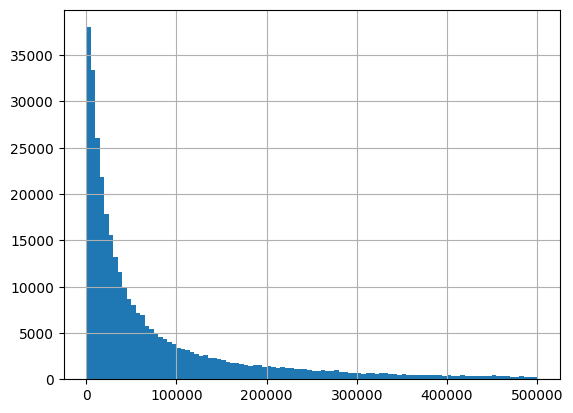

In [17]:
df_creG.loc[(df_creG.dist_up_p>0) & (df_creG.dist_up_p.abs()<500_000), 'dist_up_p'].hist(bins=100)
#plt.ylim(0,200_000)
#plt.xlim(0,500_000)


In [18]:
df_psuatac= df_nn.drop_duplicates('atac', keep='first')
df_psuatac['atac_pseudo'] = df_psuatac['atac_pseudo'].str.replace('-0','')
df_psuatac['sc_pseudo'] = df_psuatac['sc_pseudo'].str.replace('-1','')
group_ata.obs = df_psuatac.set_index('atac_pseudo').merge(group_ata.obs, left_index=True, right_index=True,how='right')

/tmp/ipykernel_814272/1938661004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_psuatac['atac_pseudo'] = df_psuatac['atac_pseudo'].str.replace('-0','')
/tmp/ipykernel_814272/1938661004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_psuatac['sc_pseudo'] = df_psuatac['sc_pseudo'].str.replace('-1','')


In [19]:
group_ata = group_ata[~group_ata.obs['sc_pseudo'].isna()]

In [20]:
df_cCREG = df_creG.drop_duplicates(['chrom','start','end'])

In [21]:
df_cCREG['region'] = df_cCREG['chrom'] + '_' + df_cCREG['start'].astype(str) + '_' + df_cCREG['end'].astype(str)
df_cCREG

/tmp/ipykernel_814272/4085734740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cCREG['region'] = df_cCREG['chrom'] + '_' + df_cCREG['start'].astype(str) + '_' + df_cCREG['end'].astype(str)


,chrom,start,end,chrom_p,start_p,end_p,score,strand,gene_name,gene_id,cCRE,dist,dist_up_p,region
0,chr1,3051676,3052177,chr1,3741571,3742571,.,-,Xkr4,ENSMUSG00000051951.6,promoter,689395,-689395,chr1_3051676_3052177
1,chr1,3055678,3056179,chr1,3741571,3742571,.,-,Xkr4,ENSMUSG00000051951.6,promoter,685393,-685393,chr1_3055678_3056179
2,chr1,3066930,3067431,chr1,3741571,3742571,.,-,Xkr4,ENSMUSG00000051951.6,promoter,674141,-674141,chr1_3066930_3067431
3,chr1,3082706,3083207,chr1,3741571,3742571,.,-,Xkr4,ENSMUSG00000051951.6,promoter,658365,-658365,chr1_3082706_3083207
4,chr1,3130969,3131470,chr1,3741571,3742571,.,-,Xkr4,ENSMUSG00000051951.6,promoter,610102,-610102,chr1_3130969_3131470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854775,chrY,90818781,90819282,chrY,90412947,90413947,.,+,Gm20837,ENSMUSG00000096178.8,promoter,-404835,-404835,chrY_90818781_90819282
854777,chrY,90819852,90820353,chrY,90412947,90413947,.,+,Gm20837,ENSMUSG00000096178.8,promoter,-405906,-405906,chrY_90819852_90820353
854779,chrY,90821949,90822450,chrY,90412947,90413947,.,+,Gm20837,ENSMUSG00000096178.8,promoter,-408003,-408003,chrY_90821949_90822450
854781,chrY,90823403,90823904,chrY,90412947,90413947,.,+,Gm20837,ENSMUSG00000096178.8,promoter,-409457,-409457,chrY_90823403_90823904


In [22]:
group_ata.var = group_ata.var.merge(df_cCREG, left_index=True, right_on='region', how='left').set_index('region')

In [23]:
adata_sc_pse = sc.read_h5ad('/data2st1/junyi/output/PseudoCellAdata.3regions.h5ad')

In [24]:
adata_sc_pse.var.head()

,feature_types,genome,mt,gane_name,highly_variable,means,dispersions,dispersions_norm
gene_ids,,,,,,,,
ENSMUSG00000051951,Gene Expression,mm10,False,Xkr4,False,1.040067,0.447860,-1.376774
ENSMUSG00000089699,Gene Expression,mm10,False,Gm1992,True,0.422076,0.888403,0.250787
ENSMUSG00000102331,Gene Expression,mm10,False,Gm19938,False,0.144075,0.560792,-0.712938
ENSMUSG00000102343,Gene Expression,mm10,False,Gm37381,False,0.000320,0.641915,-0.334050
ENSMUSG00000025900,Gene Expression,mm10,False,Rp1,True,0.003407,1.091130,0.219642


In [25]:
group_ata.var.head()

,chrom,start,end,chrom_p,start_p,end_p,score,strand,gene_name,gene_id,cCRE,dist,dist_up_p
region,,,,,,,,,,,,,
chr1_3051676_3052177,chr1,3051676,3052177,chr1,3741571,3742571,.,-,Xkr4,ENSMUSG00000051951.6,promoter,689395,-689395
chr1_3055678_3056179,chr1,3055678,3056179,chr1,3741571,3742571,.,-,Xkr4,ENSMUSG00000051951.6,promoter,685393,-685393
chr1_3066930_3067431,chr1,3066930,3067431,chr1,3741571,3742571,.,-,Xkr4,ENSMUSG00000051951.6,promoter,674141,-674141
chr1_3082706_3083207,chr1,3082706,3083207,chr1,3741571,3742571,.,-,Xkr4,ENSMUSG00000051951.6,promoter,658365,-658365
chr1_3130969_3131470,chr1,3130969,3131470,chr1,3741571,3742571,.,-,Xkr4,ENSMUSG00000051951.6,promoter,610102,-610102


In [26]:
group_ata

AnnData object with n_obs × n_vars = 799 × 355764
    obs: 'sc', 'atac', 'dist', 'sc_pseudo'
    var: 'chrom', 'start', 'end', 'chrom_p', 'start_p', 'end_p', 'score', 'strand', 'gene_name', 'gene_id', 'cCRE', 'dist', 'dist_up_p'

In [27]:
adata_scselected = adata_sc_pse[group_ata.obs['sc_pseudo']]

In [28]:
adata_scselected

View of AnnData object with n_obs × n_vars = 799 × 32285
    obs: 'n_cells', 'celltype.L1', 'n_counts'
    var: 'feature_types', 'genome', 'mt', 'gane_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'

In [29]:
%%capture
from scipy.stats import pearsonr

rs = []
ps = []

count = 0
for idx, row in group_ata.var.iterrows():
    count += 1

    gid= row['gene_id'].split('.')[0]
    atac_X = group_ata[:,idx].X

    if gid in adata_scselected.var.index:
        sc_X = adata_sc_pse[group_ata.obs['sc_pseudo'],gid].X.todense()
    else:
        rs.append(np.nan)
        ps.append(1)
        continue
    
    if (np.count_nonzero(sc_X) == 0) or (np.count_nonzero(atac_X) == 0):
        rs.append(np.nan)
        ps.append(1)
        continue
    
    r,pva = pearsonr(atac_X, sc_X)
    rs.append(r[0])
    ps.append(pva[0])



In [45]:
pccs = np.nan_to_num(rs, nan=-1)
pvals =  np.nan_to_num(ps, nan=1)

In [31]:
idx_shullfed = group_ata.obs.sample(frac=1).index
group_ata_shuffled = group_ata[idx_shullfed]

In [32]:
%%capture
rnull = []
pnull = []

count = 0
for idx, row in group_ata.var.iterrows():
    count += 1

    gid= row['gene_id'].split('.')[0]
    atac_X = group_ata_shuffled[:,idx].X
    if gid in adata_scselected.var.index:
        sc_X = adata_sc_pse[group_ata.obs['sc_pseudo'],gid].X.todense()
    else:
        # sc_X = np.zeros(atac_X.shape)
        rnull.append(np.nan)
        pnull.append(1)
        continue

    if (np.count_nonzero(sc_X) == 0) or (np.count_nonzero(atac_X) == 0):
        rnull.append(np.nan)
        pnull.append(1)
        continue

    r,pva = pearsonr(atac_X, sc_X)
    rnull.append(r[0])
    pnull.append(pva[0])

In [44]:
pccsnull = np.nan_to_num(rnull, nan=-1)
pvalsnull =  np.nan_to_num(pnull, nan=1)

In [34]:
df_pccs = pd.DataFrame({'pcc':pccs, 'pval':pvals, 'pcc_null':pccsnull, 'pval_null':pvalsnull}, index=group_ata.var.index)

In [35]:
df_pccs.to_csv(f'/data2st1/junyi/output/cCRE/{region}_{celltype}_circe_pccs.csv')

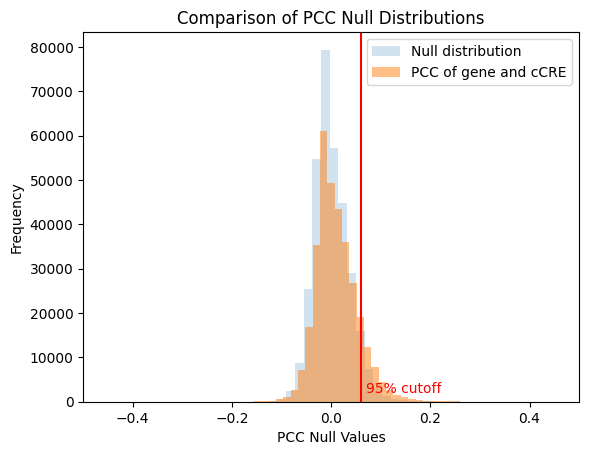

<Figure size 640x480 with 0 Axes>

In [77]:
plt.hist(df_pccs['pcc_null'], bins=100, alpha=0.2, label='Null distribution')
plt.hist(df_pccs['pcc'], bins=100, alpha=0.5, label='PCC of gene and cCRE')
plt.legend()
plt.xlabel('PCC Null Values')
plt.ylabel('Frequency')
plt.title('Comparison of PCC Null Distributions')
plt.xlim(-0.5,0.5)
plt.axvline(np.percentile(df_pccs['pcc_null'],95), color='r', linestyle='-' )  # y=position, color, linestyle
plt.text(np.percentile(df_pccs['pcc_null'],95) +0.01, 2000, f'95% cutoff', color='r')  # Position text at (x=1, y=5.1)
plt.show()
plt.savefig(f'/data2st1/junyi/output/cCRE/{region}_{celltype}_circe_pccs.png')
